In [23]:
! pip install opendatasets


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import opendatasets as od

In [25]:
url = "https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification"
od.download(url)

Skipping, found downloaded files in ".\satellite-image-classification" (use force=True to force download)


In [26]:
train_path = r"/satellite-image-classification/data"

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [28]:
img = mpimg.imread("satellite-image-classification/data/cloudy/train_10021.jpg")
print(img)

[[[151 143 119 255]
  [151 145 120 255]
  [152 148 122 255]
  ...
  [205 200 181 255]
  [206 201 182 255]
  [206 201 182 255]]

 [[151 144 120 255]
  [151 146 120 255]
  [152 149 123 255]
  ...
  [205 200 180 255]
  [205 200 181 255]
  [206 201 182 255]]

 [[151 145 121 255]
  [151 147 122 255]
  [152 149 124 255]
  ...
  [204 199 180 255]
  [205 200 180 255]
  [205 200 181 255]]

 ...

 [[226 205 206 255]
  [226 205 206 255]
  [226 205 206 255]
  ...
  [148 152 127 255]
  [149 152 127 255]
  [150 152 127 255]]

 [[226 205 206 255]
  [226 205 206 255]
  [226 205 206 255]
  ...
  [148 152 126 255]
  [150 152 127 255]
  [151 152 127 255]]

 [[226 205 206 255]
  [226 205 206 255]
  [226 205 206 255]
  ...
  [149 152 126 255]
  [151 152 127 255]
  [152 152 127 255]]]


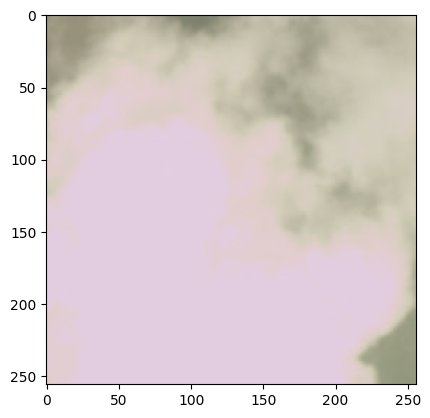

In [29]:
imgplot = plt.imshow(img)

In [30]:
import tensorflow as tf
from keras.models import Sequential
from keras.models import Model
from keras import optimizers, losses, activations, models
from keras.layers import (
    Convolution2D,
    Dense,
    Input,
    Flatten,
    Dropout,
    MaxPooling2D,
    GlobalAveragePooling2D,
)
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(
    weights="imagenet", include_top=False, input_shape=(150, 150, 3)
)
base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.2))
add_model.add(Dense(4, activation="softmax"))

model = add_model
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9),
    metrics=["accuracy"],
)
# model.summary()

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input

# Normalize the data

# Using Augmentaion
image_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2,
)


train_dataset = image_datagen.flow_from_directory(
    batch_size=32,
    directory="satellite-image-classification/data",
    shuffle=True,
    target_size=(150, 150),
    subset="training",
    class_mode="categorical",
)

validation_dataset = image_datagen.flow_from_directory(
    batch_size=32,
    directory="satellite-image-classification/data",
    shuffle=True,
    target_size=(150, 150),
    subset="validation",
    class_mode="categorical",
)

Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


In [33]:
history = model.fit(
    train_dataset,
    epochs=2,
    validation_data=validation_dataset,
)

Epoch 1/2
141/141 ━━━━━━━━━━━━━━━━━━━━ 29s 201ms/step - accuracy: 0.6151 - loss: 1.1801 - val_accuracy: 0.6377 - val_loss: 1.1602
Epoch 2/2
141/141 ━━━━━━━━━━━━━━━━━━━━ 29s 199ms/step - accuracy: 0.6330 - loss: 1.1498 - val_accuracy: 0.6430 - val_loss: 1.1207


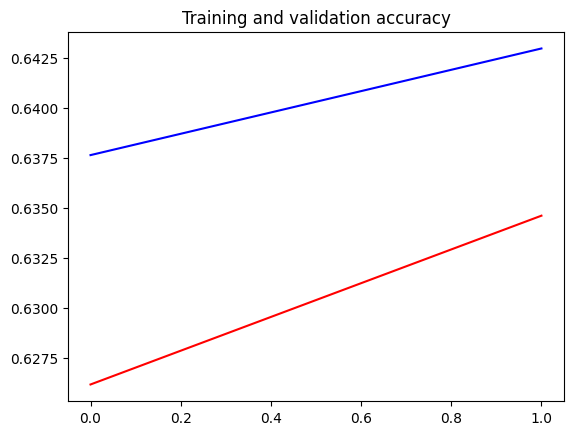

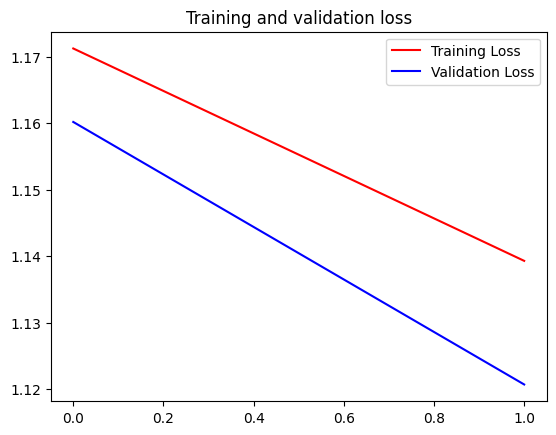

In [34]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")

plt.figure()

plt.plot(epochs, loss, "r", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [35]:
model.save("satellite_image_classification.h5")

In [36]:
cloudy_path = r"satellite-image-classification/data/cloudy"
desert_path = r"satellite-image-classification/data/desert"
green_area_path = r"satellite-image-classification/data/green_area"
water_path = r"satellite-image-classification/data/water"

In [37]:
import cv2
import os

In [38]:
images = []
labels = []

In [39]:
for i in os.listdir(cloudy_path):
    img = cv2.imread(cloudy_path + "/" + i, 0)
    img = cv2.resize(img, (64, 64))
    img = img / 255
    img = img.flatten()
    images.append(img)
    labels.append(0)

for i in os.listdir(desert_path):
    img = cv2.imread(desert_path + "/" + i, 0)
    img = cv2.resize(img, (64, 64))
    img = img / 255
    img = img.flatten()
    images.append(img)
    labels.append(1)

for i in os.listdir(green_area_path):
    img = cv2.imread(green_area_path + "/" + i, 0)
    img = cv2.resize(img, (64, 64))
    img = img / 255
    img = img.flatten()
    images.append(img)
    labels.append(2)

for i in os.listdir(water_path):
    img = cv2.imread(water_path + "/" + i, 0)
    img = cv2.resize(img, (64, 64))
    img = img / 255
    img = img.flatten()
    images.append(img)
    labels.append(3)

In [40]:
images[0]

array([0.57647059, 0.61176471, 0.58823529, ..., 0.58039216, 0.57647059,
       0.58431373])

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [28]:
from sklearn.svm import SVC

In [29]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

In [45]:
accuracy_score(y_pred, y_test)

0.8624667258207631

In [46]:
import joblib

In [47]:
joblib.dump(clf, "classifier.joblib")

['classifier.joblib']